## HeatMap

Plot rectangular data as a color-encoded matrix.

This is an Axes-level function and will draw the heatmap into the currently-active Axes if none is provided to the ax argument. Part of this Axes space will be taken and used to plot a colormap, unless cbar is False or a separate Axes is provided to cbar_ax.

In [1]:
# Basic Library
import numpy as np
import pandas as pd

# Libraries for Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import scipy

import warnings;
warnings.filterwarnings('ignore')

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


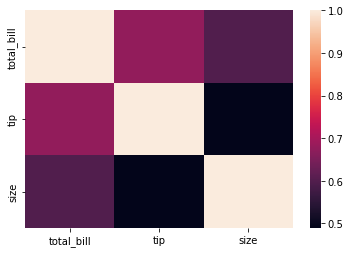

In [15]:
sns.heatmap(data=tips.corr());

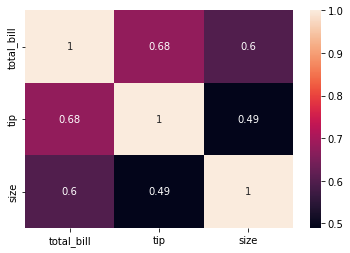

In [5]:
sns.heatmap(data=tips.corr(),annot=True);

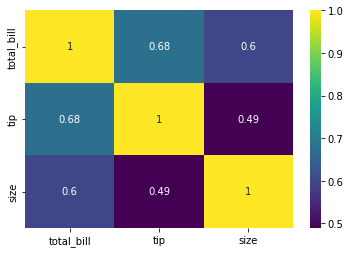

In [6]:
sns.heatmap(data=tips.corr(),cmap='viridis',annot=True);

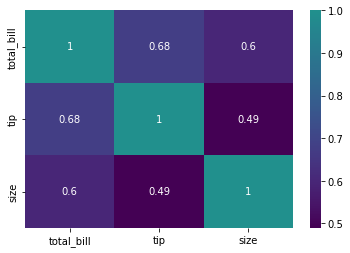

In [7]:
sns.heatmap(data=tips.corr(),cmap='viridis',annot=True,center=1);

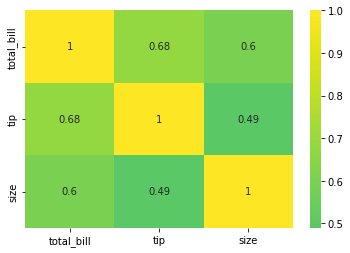

In [8]:
sns.heatmap(data=tips.corr(),cmap='viridis',annot=True,center=0);

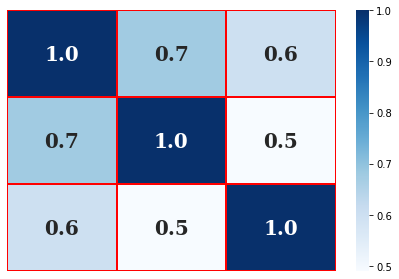

In [46]:
sns.heatmap(tips.corr(), 
            xticklabels=[], 
            yticklabels=[],
            cmap='Blues',
            annot=True,
            fmt='.1f',
            annot_kws={'fontsize':20, 'fontweight': 'bold', 'fontfamily': 'serif'},
            linewidth=2,
            linecolor='red'
           )
plt.tight_layout();
# plt.savefig('11heatmap_example_withannot.svg')

In [16]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


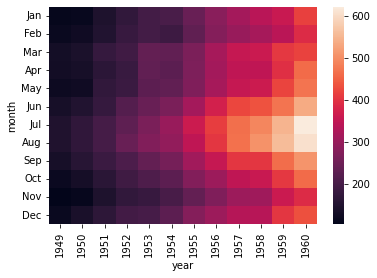

In [17]:
flights = flights.pivot("month", "year", "passengers")
ax = sns.heatmap(flights);

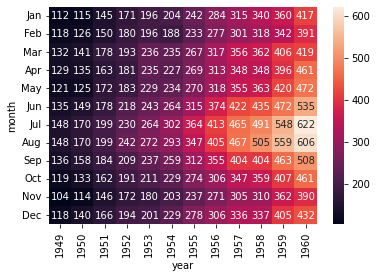

In [18]:
ax = sns.heatmap(flights, annot=True, fmt="d")

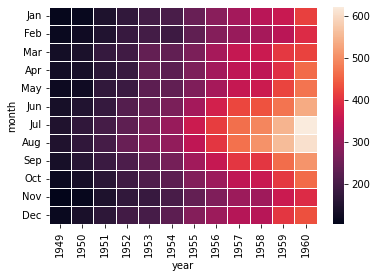

In [19]:
ax = sns.heatmap(flights, linewidths=.7)

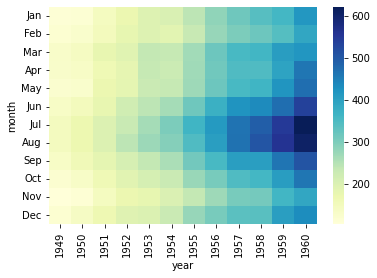

In [20]:
ax = sns.heatmap(flights, cmap="YlGnBu")

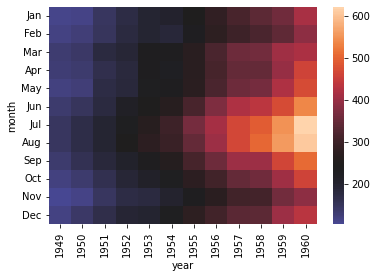

In [21]:
ax = sns.heatmap(flights, center=flights.loc["Jan", 1955])

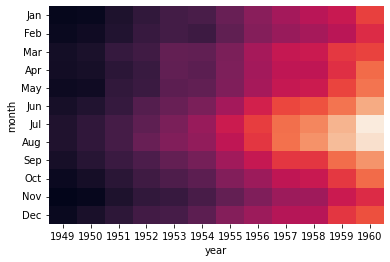

In [22]:
ax = sns.heatmap(flights, cbar=False)

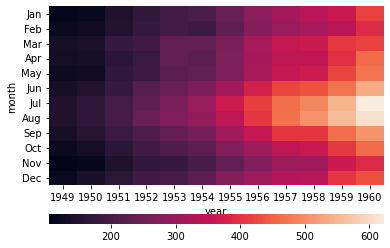

In [26]:
grid_kws = {"height_ratios": (.9, .05), "hspace": .3}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws)
ax = sns.heatmap(flights, ax=ax,
                 cbar_ax=cbar_ax,
                 cbar_kws={"orientation": "horizontal"})

In [29]:
cars = sns.load_dataset('mpg')
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [37]:
(cars
 .groupby('origin')
 .cylinders
 .value_counts()
 .unstack()
 .fillna(0)
)

cylinders,3,4,5,6,8
origin,,,,,
europe,0.0,63.0,3.0,4.0,0.0
japan,4.0,69.0,0.0,6.0,0.0
usa,0.0,72.0,0.0,74.0,103.0


In [38]:
origin_cyl = (
    cars
    .groupby('origin')
    .cylinders
    .value_counts()
    .unstack()
    .fillna(0)
)

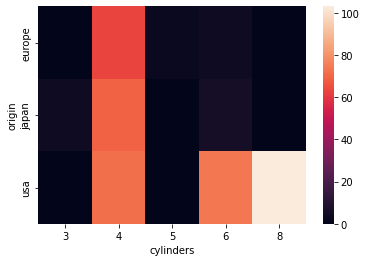

In [39]:
sns.heatmap(origin_cyl);

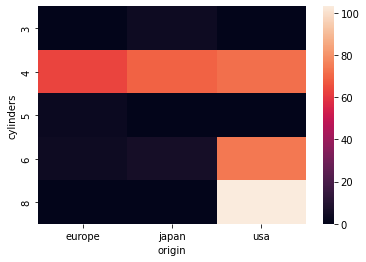

In [40]:
sns.heatmap(origin_cyl.T);

In [41]:
cars.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


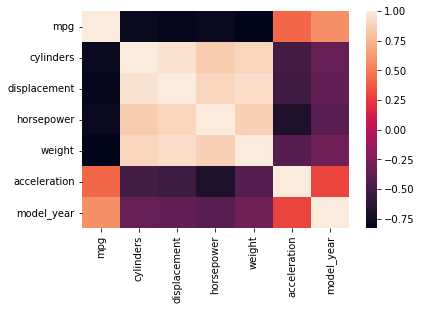

In [42]:
sns.heatmap(cars.corr());

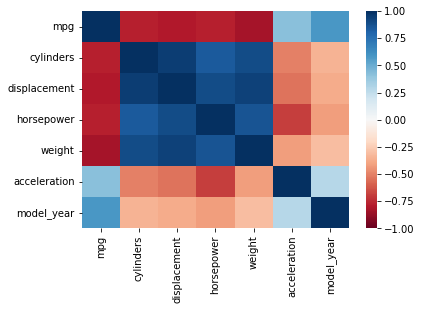

In [43]:
sns.heatmap(cars.corr(), cmap='RdBu', vmin=-1, vmax=1);

In [47]:
labels = ['MPG', 'Cylinders', 'Displacement', 'Horsepower',
          'Weight', 'Acceleration', 'Model Year'
         ]

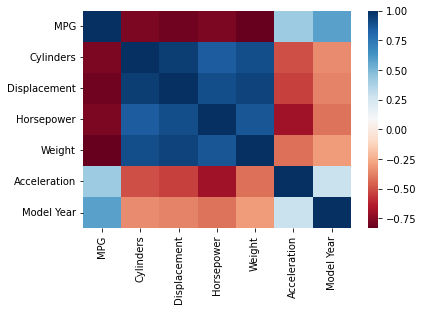

In [48]:
sns.heatmap(cars.corr(), 
            cmap='RdBu',
            xticklabels=labels,
            yticklabels=labels
           );

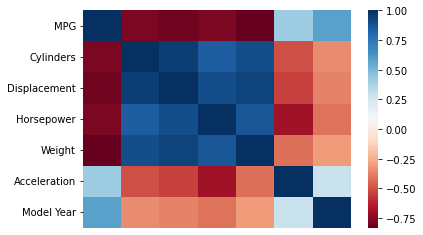

In [49]:
sns.heatmap(cars.corr(), 
            cmap='RdBu', 
            xticklabels=False,
            yticklabels=labels
           );

## EXAMPLE

In [50]:
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

In [51]:
xlabels = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri']
ylabels = ['Coffee', 'Juice', 'Soda', 'Tea']

orders = np.array([[44, 31, 50, 41, 30], 
                   [21, 12, 28, 38, 35],
                   [15, 18, 20, 14, 12],
                   [38, 29, 39, 26, 11]]
                 )

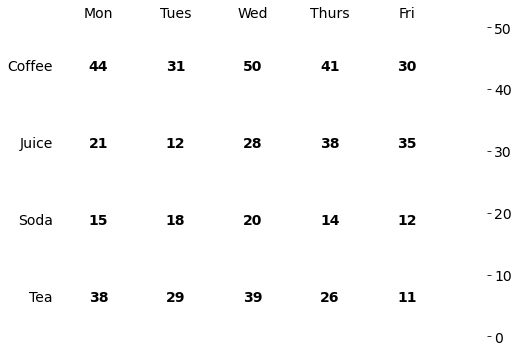

In [52]:
plt.figure(figsize=(8,5))
sns.heatmap(orders, 
            cmap='YlOrBr',
            vmin=0,
            xticklabels=xlabels,
            yticklabels=ylabels,
            annot=True,
            alpha=0,
            square=True,
            annot_kws={'fontsize':14, 'fontweight': 'bold', 'color': 'black'}
           )
plt.yticks(rotation=0)
plt.tick_params(
    which='both',      
    bottom=False,      
    left=False,      
    labelbottom=False,
    labeltop=True) 
plt.tight_layout();

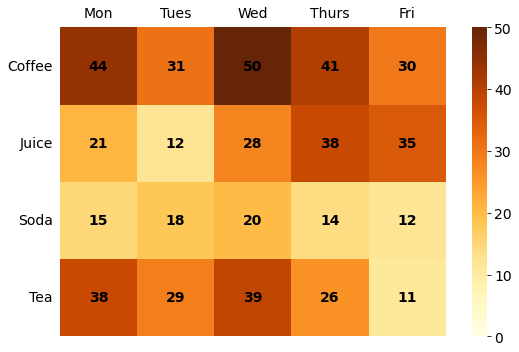

In [53]:
plt.figure(figsize=(8,5))
sns.heatmap(orders, 
            cmap='YlOrBr',
            vmin=0,
            xticklabels=xlabels,
            yticklabels=ylabels,
            annot=True,
            square=True,
            annot_kws={'fontsize':14, 'fontweight': 'bold', 'color': 'black'}
           )
plt.yticks(rotation=0)
plt.tick_params(
    which='both',      
    bottom=False,      
    left=False,      
    labelbottom=False,
    labeltop=True) 
plt.tight_layout();